<h1>Patient Survival Prediction</h1>
<hr>
<h2>Project 4</h2>
<p>This project predicts the survival of pacients in a UCI.</p>
<hr>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from utilerias import missing_values_table

%matplotlib inline

In [2]:
#read dataset
df_patients = pd.read_csv('../datasets/Dataset.csv')

<hr>
<h2>EDA</h2>
<hr>

In [3]:
#eliminate any kind of format or upper letters on the feature's names
df_patients.columns=df_patients.columns.str.lower().str.replace(' ', '_')

In [22]:
df_patients

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                     0  Caucasian      M   180.3  ...  0.0       0.0   
1                     0  Caucasian      F   160.0  ...  0.0       0.0   
2                     0  Caucasian      F   172.7  ...  0.0       0.0   
3                     1  Caucasian      F   165.1  ...  0.0       0.0   
4                     0  Caucasian      M   188.0  ...  0.0       0.0   
...                 ...        ...    ...     ...  ...  ...       ...   
91708                 0  Caucasian      M   177.8  ...  0.0       0.0   
91709                 0  Caucasian      F   183.0  ...  0.0       0.0   
91710                 0  Caucasian      M   170.2  ...  0.0       0.0   
91711                 0  Caucasian      F   154.9  ...  0.0       0.0   
91712                 1  Caucasian      F   160.0  ...  0.0       0.0   

       diabetes_mellitus hepatic_failure immunosuppression  leukemia  \
0                    1.0             0.0               0.0       0.0   
1                    1.0             0.0               0.0       0.0   
2                    0.0             0.0               0.0       0.0   
3                    0.0             0.0               0.0       0.0   
4                    0.0             0.0               0.0       0.0   
...                  ...             ...               ...       ...   
91708                1.0             0.0               0.0       0.0   
91709                0.0             0.0               0.0       0.0   
91710                1.0             0.0               0.0       0.0   
91711                0.0             0.0               0.0       0.0   
91712                0.0             0.0               0.0       0.0   

       lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
0           0.0                          0.0                Sepsis   
1           0.0                          0.0           Respiratory   
2           0.0                          0.0             Metabolic   
3           0.0                          0.0        Cardiovascular   
4           0.0                          0.0                Trauma   
...         ...                          ...                   ...   
91708       0.0                          1.0                Sepsis   
91709       0.0                          0.0                Sepsis   
91710       0.0                          0.0             Metabolic   
91711       0.0                          0.0           Respiratory   
91712       0.0                          0.0      Gastrointestinal   

       apache_2_bodysystem  
0           Cardiovascular  
1              Respiratory  
2                Metabolic  
3           Cardiovascular  
4                   Trauma  
...                    ...  
91708       Cardiovascular  
91709       Cardiovascular  
91710            Metabolic  
91711          Respiratory  
91712     Gastrointestinal  

[91713 rows x 186 columns]

In [15]:
df_patients.shape

(91713, 186)

In [27]:
df_patients.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975          0.000000    162.500000   
50%       65.000000     27.654655          0.000000    170.100000   
75%       75.000000     32.930206          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  ...  apache_4a_hospital_death_prob  \
count  91713.000000      91713.000000  ...                   83766.000000   
mean     508.357692          0.835766  ...                       0.086787   
std      228.989661          2.487756  ...                       0.247569   
min       82.000000        -24.947222  ...                      -1.000000   
25%      369.000000          0.035417  ...                       0.020000   
50%      504.000000          0.138889  ...                       0.050000   
75%      679.000000          0.409028  ...                       0.130000   
max      927.000000        159.090972  ...                       0.990000   

       apache_4a_icu_death_prob          aids     cirrhosis  \
count              83766.000000  90998.000000  90998.000000   
mean                   0.043955      0.000857      0.015693   
std                    0.217341      0.029265      0.124284   
min                   -1.000000      0.000000      0.000000   
25%                    0.010000      0.000000      0.000000   
50%                    0.020000      0.000000      0.000000   
75%                    0.060000      0.000000      0.000000   
max                    0.970000      1.000000      1.000000   

       diabetes_mellitus  hepatic_failure  immunosuppression      leukemia  \
count       90998.000000     90998.000000       90998.000000  90998.000000   
mean            0.225192         0.012989           0.026165      0.007066   
std             0.417711         0.113229           0.159628      0.083763   
min             0.000000         0.000000           0.000000      0.000000   
25%             0.000000         0.000000           0.000000      0.000000   
50%             0.000000         0.000000           0.000000      0.000000   
75%             0.000000         0.000000           0.000000      0.000000   
max             1.000000         1.000000           1.000000      1.000000   

           lymphoma  solid_tumor_with_metastasis  
count  90998.000000                 90998.000000  
mean       0.004132                     0.020638  
std        0.064148                     0.142169  
min        0.000000                     0.000000  
25%        0.000000                     0.000000  
50%        0.000000                     0.000000  
75%        0.000000                     0.000000  
max        1.000000                     1.000000  

[8 rows x 178 columns]

In [4]:
df_patients.describe(include=['O']).T

count unique                   top   freq
ethnicity              90318      6             Caucasian  70684
gender                 91688      2                     M  49469
hospital_admit_source  70304     15  Emergency Department  36962
icu_admit_source       91601      5  Accident & Emergency  54060
icu_stay_type          91713      3                 admit  86183
icu_type               91713      8          Med-Surg ICU  50586
apache_3j_bodysystem   90051     11        Cardiovascular  29999
apache_2_bodysystem    90051     10        Cardiovascular  38816

In [18]:
df_patients.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   hospital_admit_source          70304 non-null  object 
 11   icu_admit_source               91601 non-null  object 
 12   icu_id                        

/tmp/ipykernel_40678/1212657085.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [23]:
#show null values
#remember de recomendation about to drop a column with more than 80% of nulls

missing_values_table(df_patients).style.background_gradient(cmap='Blues')
#table.style.background_gradient(cmap='Blues')

Sumary :
Columns     :186
Null values :175


Remember to delete the selected features on the preprossesing stage

<hr>
<h2>Univariable Analysis</h2>
<hr>

In [5]:
#lets delete some features
#1) those that seems not related
lstFeaturesToDrop1 = ['encounter_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 'hospital_id', 'readmission_status']
#2) those with 50% of missing values or more.
lstFeaturesToDrop2 = ['h1_bilirubin_max'
,'h1_bilirubin_min'
,'h1_lactate_min'
,'h1_lactate_max'
,'h1_albumin_max'
,'h1_albumin_min'
,'h1_pao2fio2ratio_min'
,'h1_pao2fio2ratio_max'
,'h1_arterial_ph_min'
,'h1_arterial_ph_max'
,'h1_hco3_min'
,'h1_hco3_max'
,'h1_arterial_pco2_min'
,'h1_arterial_pco2_max'
,'h1_wbc_max'
,'h1_wbc_min'
,'h1_arterial_po2_max'
,'h1_arterial_po2_min'
,'h1_calcium_min'
,'h1_calcium_max'
,'h1_platelets_max'
,'h1_platelets_min'
,'h1_bun_min'
,'h1_bun_max'
,'h1_creatinine_min'
,'h1_creatinine_max'
,'h1_diasbp_invasive_max'
,'h1_diasbp_invasive_min'
,'h1_sysbp_invasive_max'
,'h1_sysbp_invasive_min'
,'h1_mbp_invasive_min'
,'h1_mbp_invasive_max'
,'h1_hematocrit_min'
,'h1_hematocrit_max'
,'h1_hemaglobin_max'
,'h1_hemaglobin_min'
,'h1_sodium_max'
,'h1_sodium_min'
,'h1_potassium_min'
,'h1_potassium_max'
,'ph_apache'
,'pao2_apache'
,'paco2_for_ph_apache'
,'paco2_apache'
,'fio2_apache'
,'d1_lactate_max'
,'d1_lactate_min'
,'d1_diasbp_invasive_min'
,'d1_diasbp_invasive_max'
,'d1_sysbp_invasive_max'
,'d1_sysbp_invasive_min'
,'d1_mbp_invasive_min'
,'d1_mbp_invasive_max'
,'d1_pao2fio2ratio_min'
,'d1_pao2fio2ratio_max'
,'d1_arterial_ph_min'
,'d1_arterial_ph_max'
,'d1_arterial_pco2_max'
,'d1_arterial_pco2_min'
,'d1_arterial_po2_min'
,'d1_arterial_po2_max'
,'bilirubin_apache'
,'h1_inr_max'
,'d1_inr_min'
,'h1_inr_min'
,'d1_inr_max'
,'albumin_apache'
,'d1_bilirubin_min'
,'d1_bilirubin_max'
,'h1_glucose_min'
,'h1_glucose_max'
,'d1_albumin_min'
,'d1_albumin_max'
,'urineoutput_apache']

In [4]:
lstGraph =['glucose_apache'
,'d1_potassium_max'
,'h1_mbp_noninvasive_max'
,'apache_4a_hospital_death_prob'
,'apache_4a_icu_death_prob'
,'d1_glucose_max'
,'h1_mbp_max'
,'h1_resprate_min'
,'h1_resprate_max'
,'age'
,'h1_spo2_min'
,'h1_spo2_max'
,'bmi'
,'h1_heartrate_max'
,'weight'
,'height'
,'resprate_apache'
,'heart_rate_apache'
,'intubated_apache'
,'aids'
,'hepatic_failure'
,'immunosuppression'
,'solid_tumor_with_metastasis'
,'leukemia'
,'cirrhosis'
,'diabetes_mellitus'
,'d1_spo2_max'
,'gender'
]

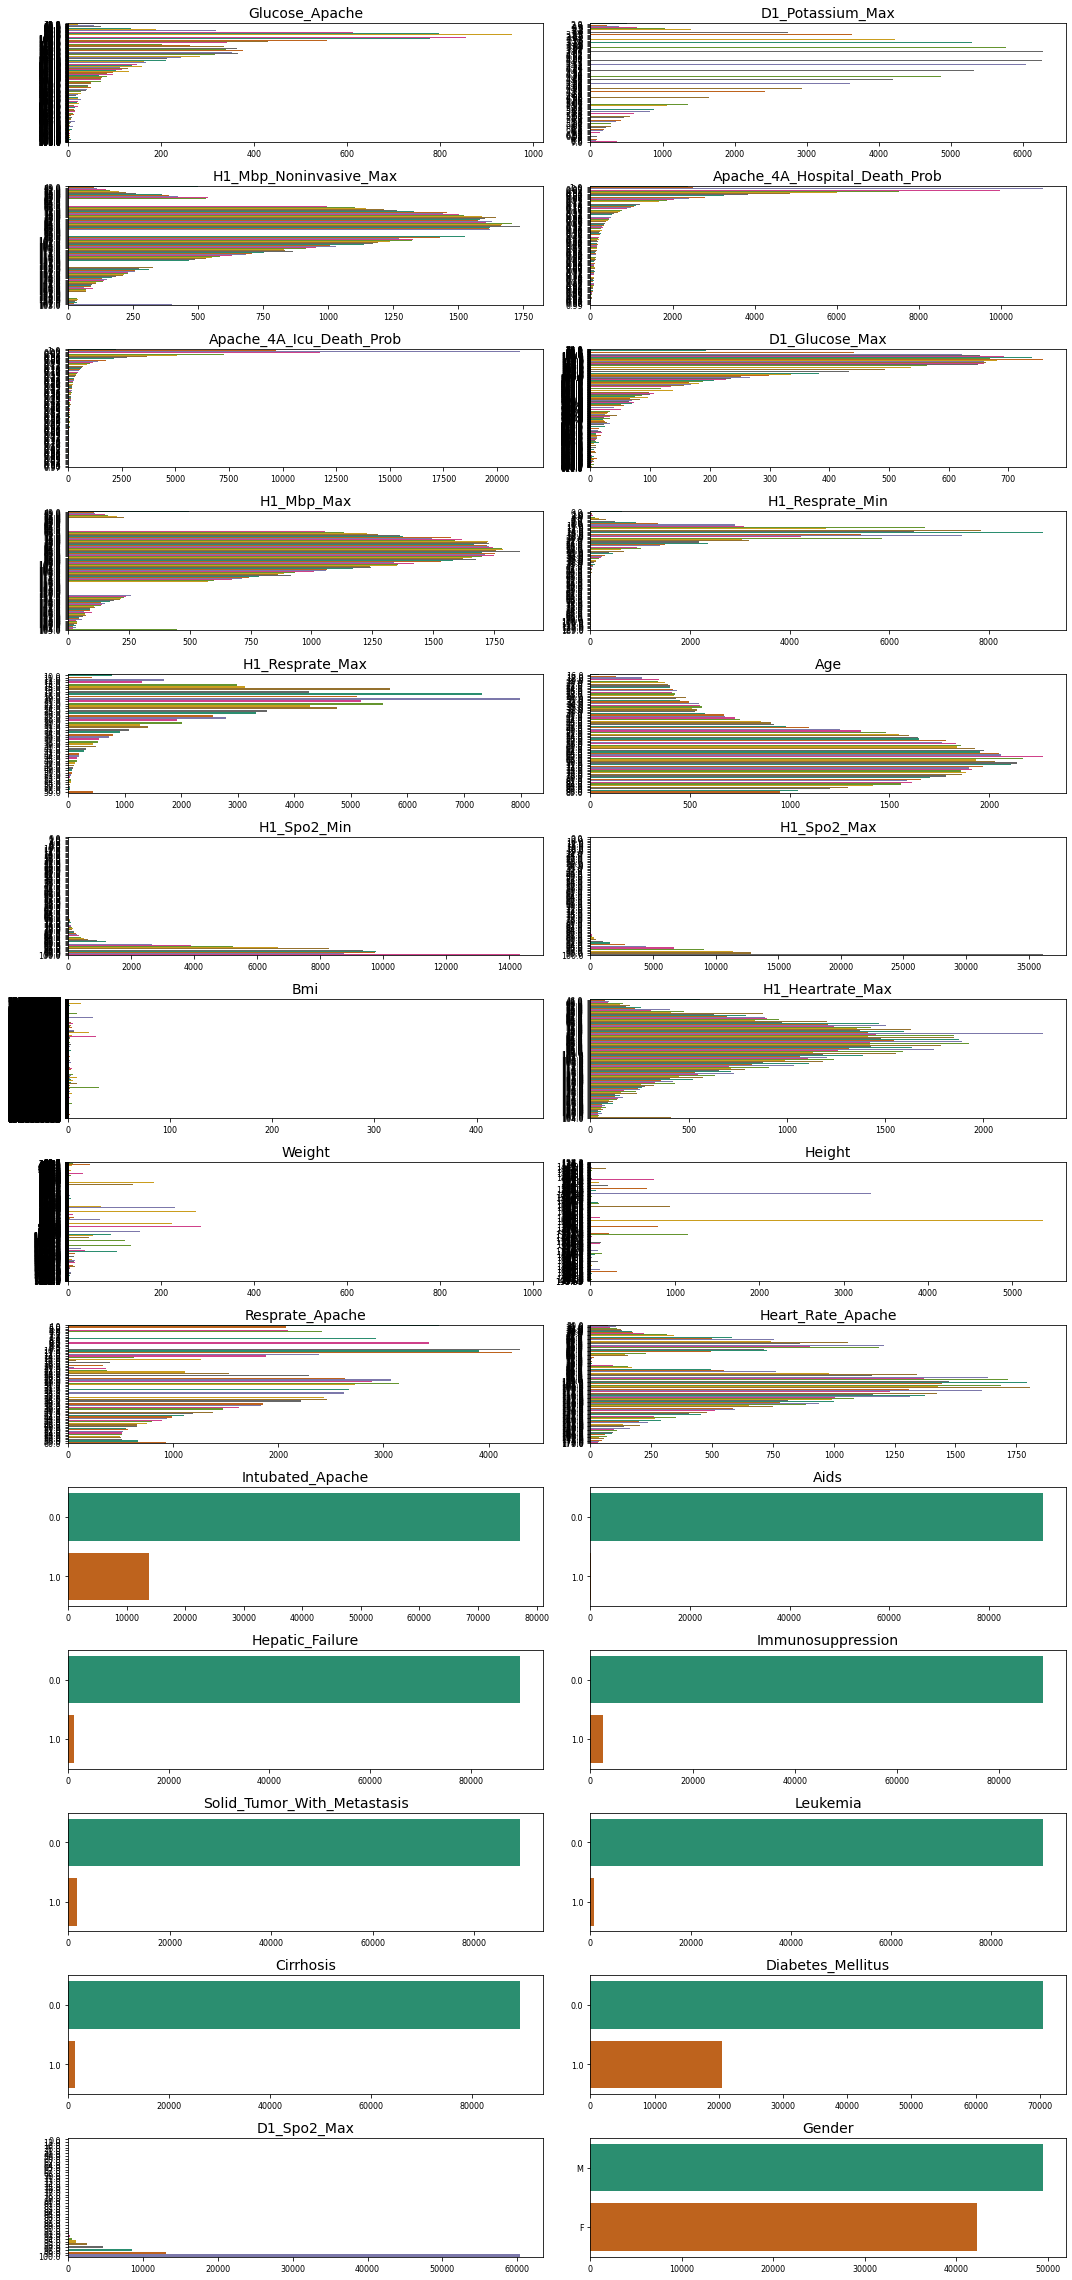

In [6]:
#showing features from every dataset in order to compare them
plt.figure(figsize=(15,140))
plotnumber = 1

for col in df_patients[lstGraph]:
    if plotnumber <= df_patients.shape[1]:
        ax1 = plt.subplot(62,2,plotnumber)
        sns.countplot(data=df_patients, y=col, palette='Dark2')
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
        
    plotnumber +=1
plt.tight_layout()

<hr>
<h3>Multivariable</h3>
<hr>
<p>traditionally patients intubated, overheigth, serious decease suffering, and males have less chances to survive in a UCI, lets compare them agaist target variable</p>

In [8]:

fig = px.histogram(df_patients[['age','gender','hospital_death','bmi']].dropna(), x="age", y="hospital_death", color="gender",
                   marginal="box", # or violin, rug
                   hover_data=df_patients[['age','gender','hospital_death','bmi']].columns)
fig.show()

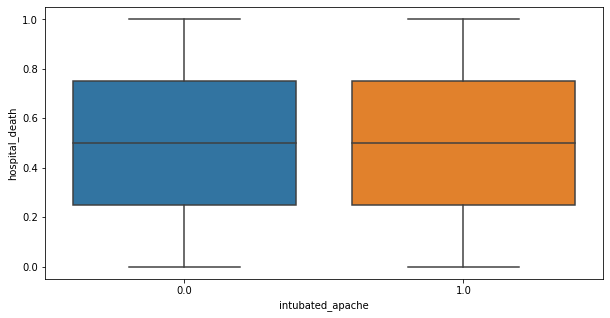

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df_patients[['intubated_apache','hospital_death']].dropna().drop_duplicates(), y='hospital_death', x='intubated_apache');